In [0]:
import urllib
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt


In [0]:
def download(species: str):
  url = 'http://www.fishtedb.org/project/download?species=' + species
  filepath = species + '.txt'
  urllib.request.urlretrieve(url, filepath)

  return filepath

In [0]:
def read(filepath: str):
  with open(filepath,'r') as handler:
    data = {}

    for line in handler:
      line = line.strip("\n")
      if '>' in line:
        key = line.partition('/')[2]

        if '-' in key:
          key = key.partition('-')[0]

        if key is '':
          key = 'unknown'
        continue

      if key not in data:
        data[key] = []

      counts = {
          'A': line.count('A'),
          'C': line.count('C'),
          'G': line.count('G'),
          'T': line.count('T'),
      }

      data[key].append((counts['G']+counts['C']) / (counts['G']+counts['C']+counts['A']+counts['T']) * 100)
    
    print(data.keys())


    df_o = pd.DataFrame.from_dict(data, orient='index')
    # display(df_o.T)
    
    class1 =[
        "Copia",
        "RTE",
        "I",
        "L1",
        "L2",
        "Jockey",
        "Gypsy",
        "Ngaro",
        "Rex",
        # "Rex-Babar",
        "LTR",
        "U",
        "Penelope",
        "MIR",
        "ERVK",
        "ERV1",
        "R2",
        # "R2-Hero",
        "SINE",
        "LINE",
        "Pao",
        "Tad1",
        "RTE" # -BovB",
    ]
    
    class2 = [
        "TcMar",
        # "TcMar-Tc1",
        # "TcMar-Mariner",
        # "TcMar-Tigger",
        # "TcMar-Fot1",
        # "TcMar-Tc2",
        "Academ",
        "Maverick",
        "hAT",
        # "hAT-Tol2",
        # "hAT-Tip100",
        # "hAT-Charlie",
        "Dada",
        "hAT", #-Ac",
        "CMC", #-EnSpm",
        "DNA",
        "PiggyBac",
        "PIF", # -Harbinger",
        "Helitron",
        "CACTA"
    ]

    df1 = pd.DataFrame(df_o.T, columns=class1)

    df1.plot.box(figsize=(18,5),  patch_artist=True)
    plt.xticks(
      rotation=45,
      horizontalalignment='right',
      fontweight='light',
      fontsize='medium',
    )

    plt.show()

    df2 = pd.DataFrame(df_o.T, columns=class2)
    ax = df2.plot.box(figsize=(18,5), patch_artist=True)
    
    plt.xticks(
      rotation=45,
      horizontalalignment='right',
      fontweight='light',
      fontsize='medium',
    )
    
    plt.show()

    pd.DataFrame.from_dict({'class 1': df2.mean().values, 'class 2': df1.mean().values}, orient='index').T.plot.box(figsize=(18,5), patch_artist=True)

dict_keys(['TcMar', 'RTE', 'L2', 'Rex', 'LTR', 'Gypsy', 'hAT', 'Penelope', 'Academ', 'Maverick', 'CMC', 'I', 'Ngaro', 'Dada', 'ERVK', 'MIR', 'PIF', 'PiggyBac', 'Jockey', 'ERV1', 'R2', 'L1', 'Copia', 'Helitron', 'U', 'Pao', 'Tad1', 'LINE', 'DNA', 'unknown', 'SINE'])


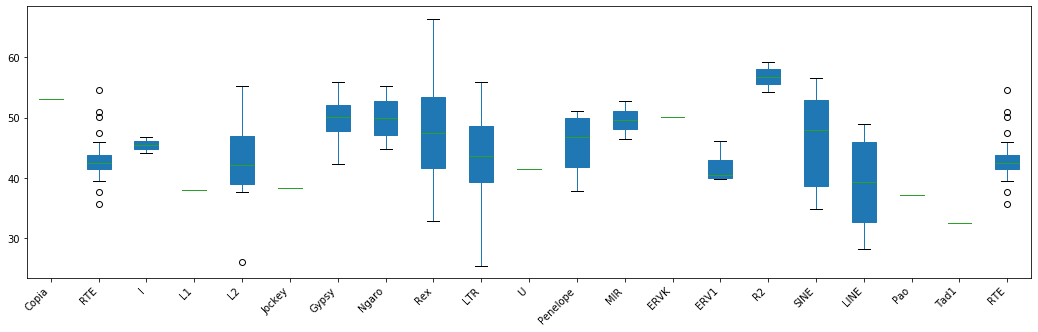

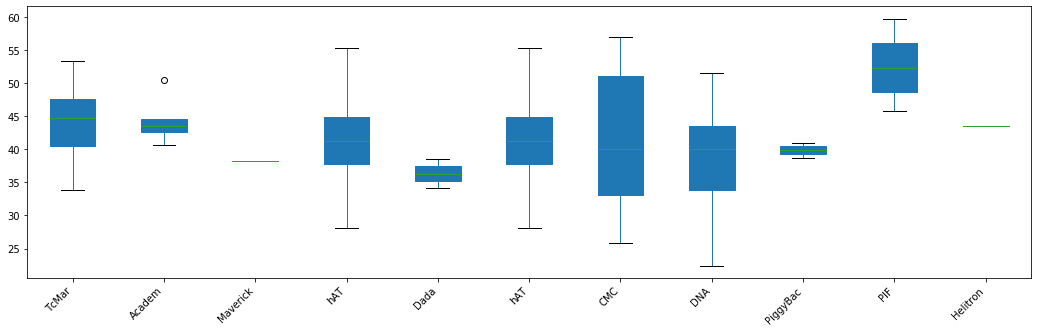

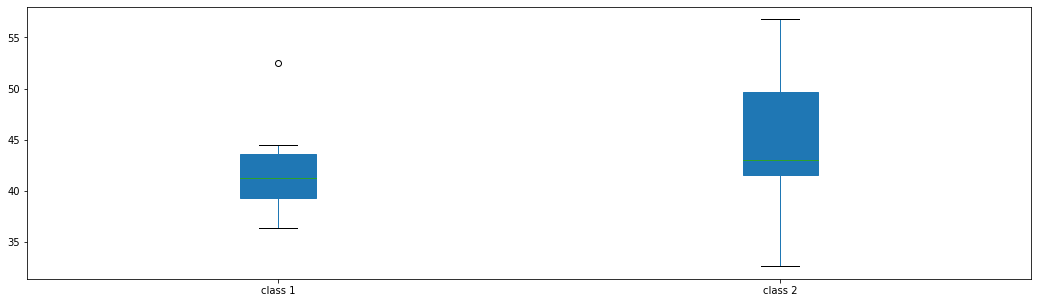

In [217]:
read(download('cynoglossus+semilaevis'))

dict_keys(['CR1', 'L1', 'RTE', 'R2', 'I', 'Rex', 'L2', 'TcMar', 'Gypsy', 'hAT', 'PIF', '5S', 'Ngaro', 'tRNA', 'CMC', 'MIR', 'Helitron', 'PiggyBac', 'Novosib', 'DIRS', 'Crypton', 'Copia', 'Jockey', 'Pao', 'Academ', 'Kolobok', 'Sola', 'ERV1', 'ERVK', 'unknown', 'LTR', 'DNA', 'SINE', 'nonLTR', 'CACTA', 'LINE', 'Harbinger'])


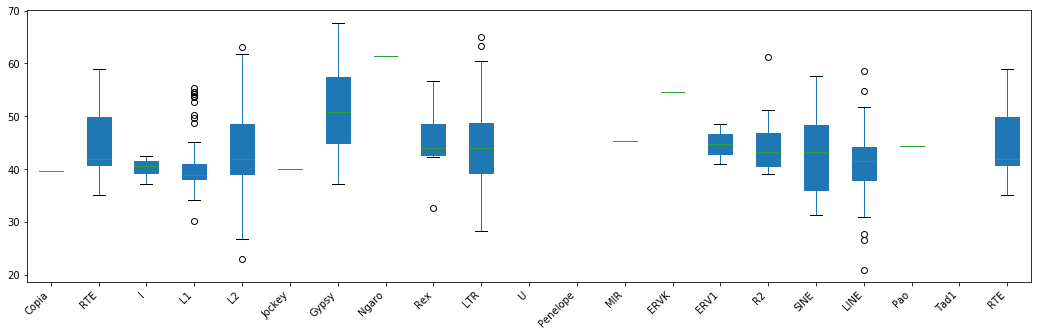

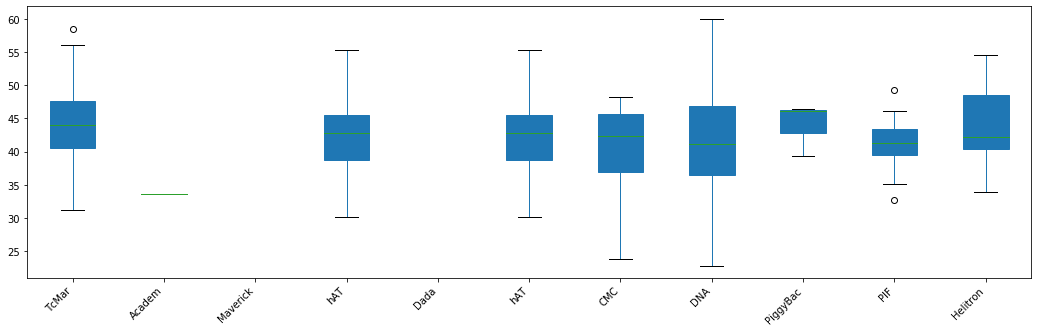

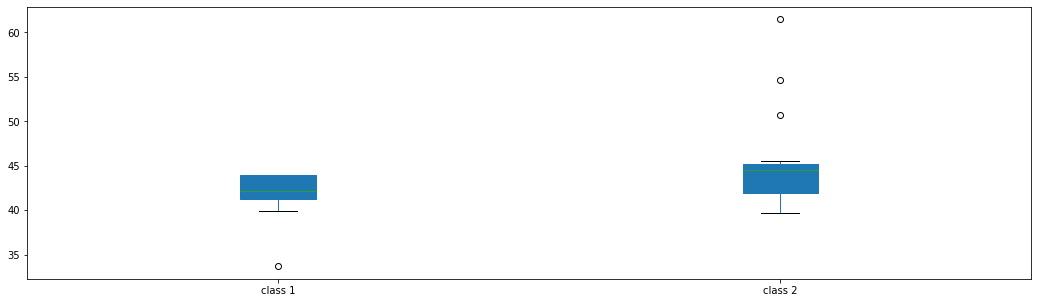

In [216]:
read(download('anguilla+anguilla'))

dict_keys(['Academ', 'DNA', 'Kolobok', 'Pao', 'LTR', 'Copia', 'CR1', 'L2', 'unknown', 'Crypton', 'Dada', 'SINE', 'DIRS', 'CACTA', 'hAT', 'Harbinger', 'Sola', 'Zisupton', 'Merlin', 'TcMar', 'ERV1', 'ERV2', 'ERV', 'RTE', 'Ginger', 'Gypsy', 'tRNA', 'Helitron', 'R2', 'PIF', 'L1', 'PiggyBac', 'MuLE', 'Ngaro', 'P', 'Penelope', 'Proto2', 'Rex', '5s', 'Zator'])


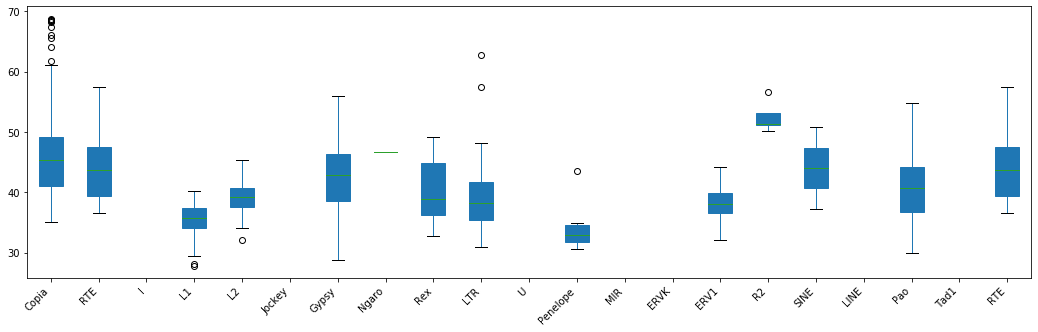

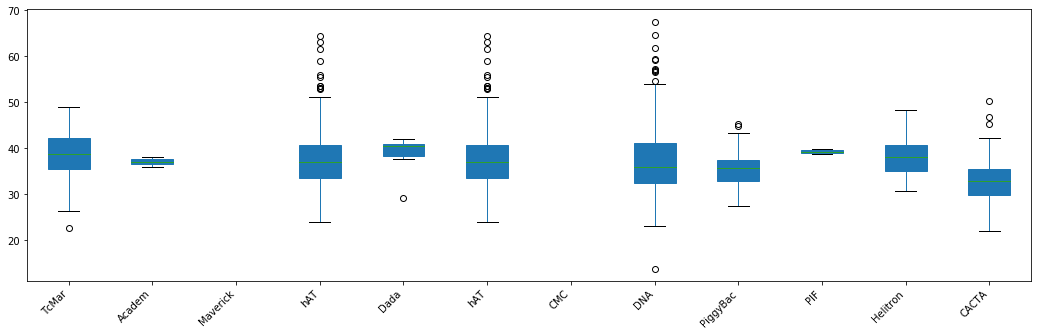

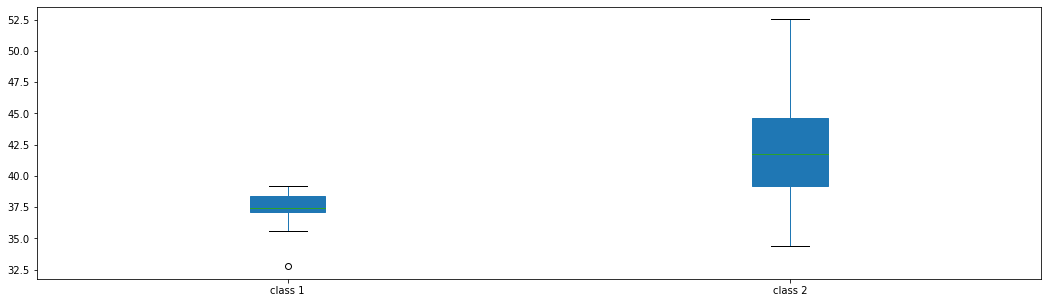

In [221]:
read(download('danio+rerio'))

dict_keys(['L1', 'hAT', 'Maverick', 'TcMar', 'Rex', 'L2', 'RTE', 'R2', 'I', 'Gypsy', 'LTR', 'LINE', 'Penelope', 'MIR', 'tRNA', '5S', 'CR1', 'Ngaro', 'Helitron', 'ERV1', 'ID', 'PIF', 'Jockey', 'PiggyBac', 'Copia', 'DNA', 'unknown', 'SINE', 'CACTA', 'nonLTR'])


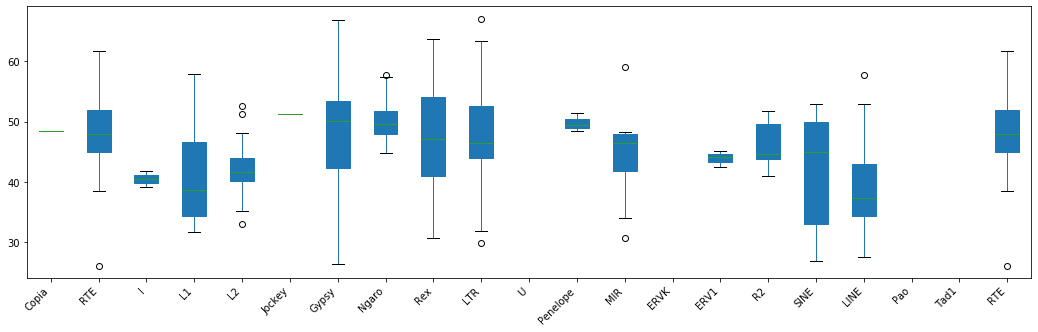

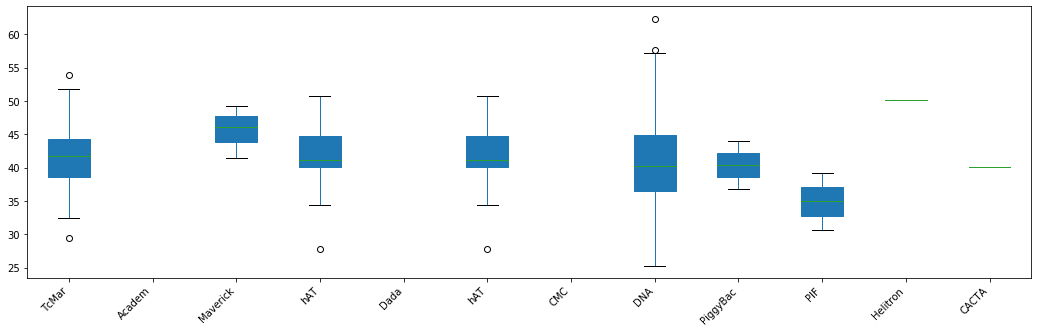

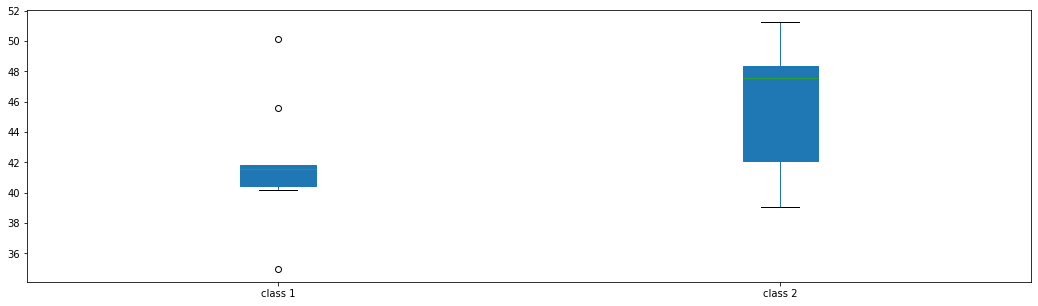

In [223]:
read(download('lepisosteus+oculatus'))